In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('EmployeesOrders.csv')

In [3]:
df.head()

,EmployeeName,OrderId,Amount,UnitPrice,Quantity
0,Michael Suyama,10249,167.4,18.6,9
1,Michael Suyama,10249,1696.0,42.4,40
2,Margaret Peacock,10250,77.0,7.7,10
3,Margaret Peacock,10250,1484.0,42.4,35
4,Margaret Peacock,10250,252.0,16.8,15


In [4]:
sns.set(rc={'figure.figsize':(12,10), 'axes.labelsize':18, 
            'xtick.labelsize': 14, 'ytick.labelsize': 14})

In [5]:
df.EmployeeName = df.EmployeeName.str.replace(' ', '\n')

In [6]:
df = df[df.Amount < 8000]

[Text(0,0.5,'Valores de Pedidos'), Text(0.5,0,'Nome do Funcionário')]

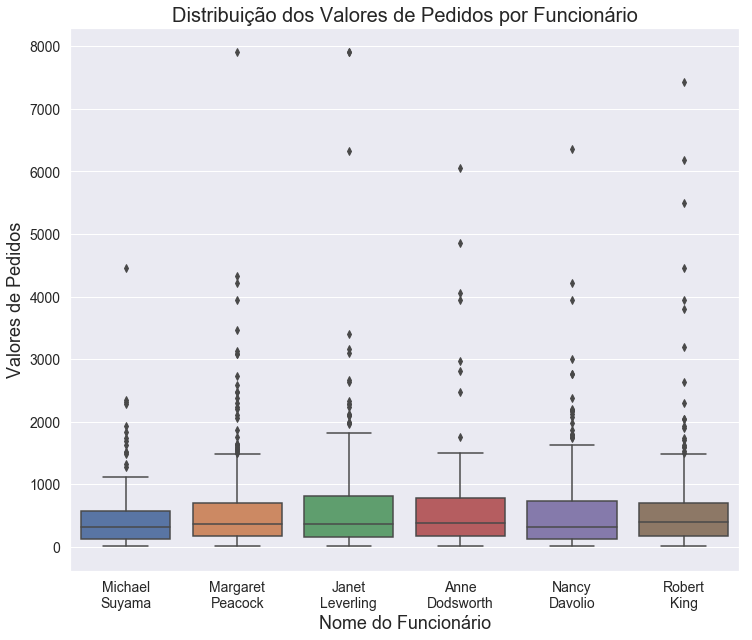

In [23]:
ax = sns.boxplot(x='EmployeeName', y='Amount', data=df)
ax.axes.set_title('Distribuição dos Valores de Pedidos por Funcionário', fontsize=20)
ax.set(xlabel='Nome do Funcionário', ylabel='Valores de Pedidos')

In [8]:
grouped = df.groupby('EmployeeName')[['EmployeeName','Amount']].sum()

In [9]:
grouped

,Amount
EmployeeName,
Anne\nDodsworth,72424.00
Janet\nLeverling,203148.10
Margaret\nPeacock,239647.45
Michael\nSuyama,78198.10
Nancy\nDavolio,186333.71
Robert\nKing,120426.79


In [10]:
aux = pd.DataFrame({'EmployeeName':grouped.index, 
                    'Amount':[grouped.Amount[i] for i in range(len(grouped.Amount))]})
grouped = aux

[Text(0,0.5,'Montante Total ($)'), Text(0.5,0,'Nome do Funcionário')]

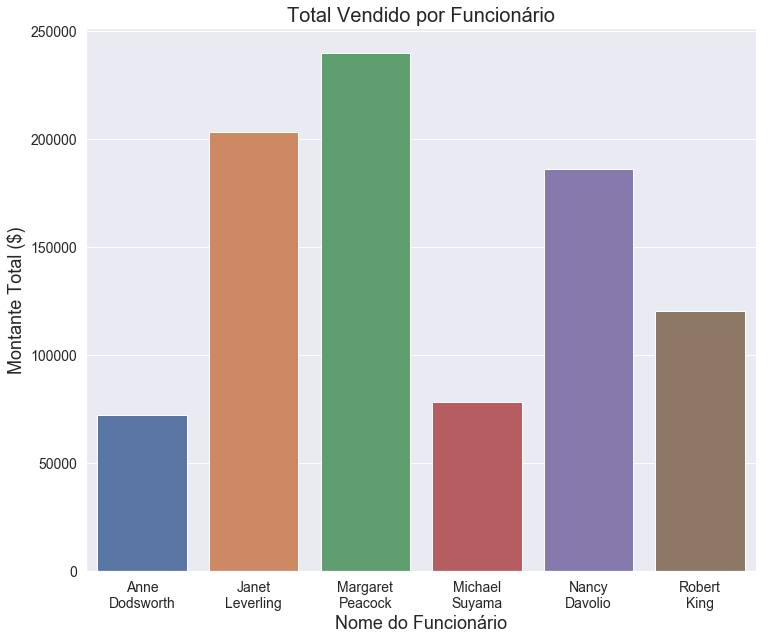

In [22]:
ax = sns.barplot(x='EmployeeName', y='Amount', data=grouped)
ax.axes.set_title('Total Vendido por Funcionário', fontsize=20)
ax.set(xlabel='Nome do Funcionário', ylabel='Montante Total ($)')

[Text(0,0.5,'Valor do Pedido'), Text(0.5,0,'Preço Unitário')]

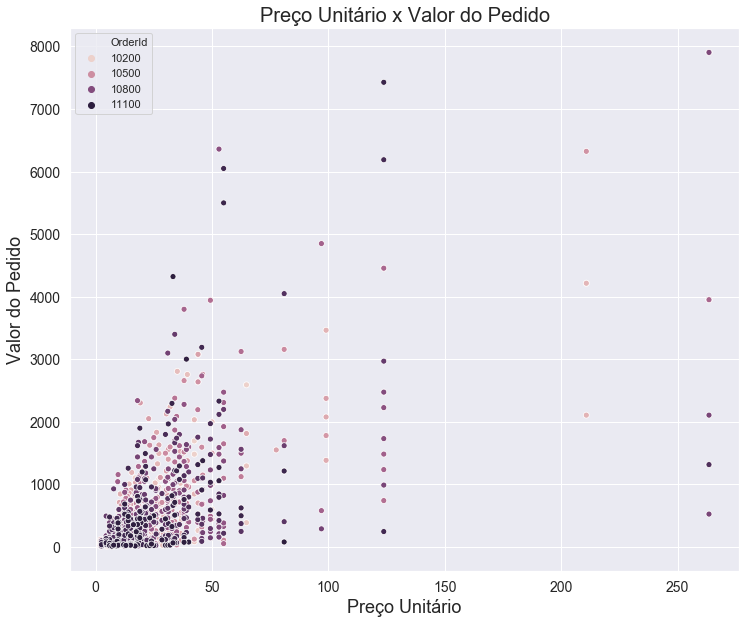

In [17]:
ax = sns.scatterplot(x='UnitPrice', y='Amount', data=df, hue='OrderId')
ax.axes.set_title('Preço Unitário x Valor do Pedido', fontsize=20)
ax.set(xlabel='Preço Unitário', ylabel='Valor do Pedido')